In [ ]:
import pandas as pd

df = pd.read_csv("/content/iris.csv",header = None)

df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.columns =  [
    "Sepal length",
    "Sepal width",
    "Petal length",
    "Petal width",
    "Class label"
]


In [ ]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
def convert_class_label(clase):
  if clase == "Iris-setosa":
    return 0
  elif clase == "Iris-versicolor":
    return 1
  elif clase == "Iris-virginica":
    return 2

In [ ]:
df["Number_Class"] = df["Class label"].apply(convert_class_label)

In [ ]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class label,Number_Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


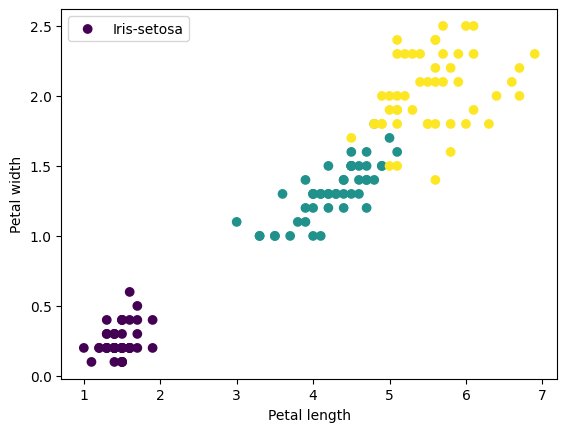

In [ ]:
import matplotlib.pyplot as plt



plt.figure()

plt.scatter(
    df["Petal length"],
    df["Petal width"],
    c = df["Number_Class"]
)

plt.legend(df["Class label"])

plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.show()

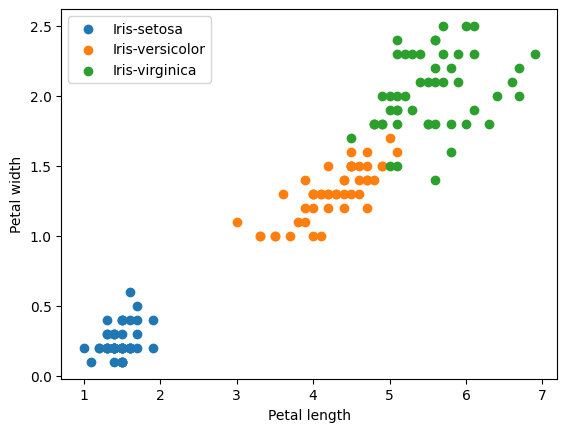

In [ ]:
import matplotlib.pyplot as plt

# Get the unique classes
clases = df["Class label"].unique()

plt.figure()

for clase in clases:
    # Filter the DataFrame by class
    df_clase = df[df["Class label"] == clase]

    # Draw only the points of that class, with your own label
    plt.scatter(
        df_clase["Petal length"],
        df_clase["Petal width"],
        label=clase
    )

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()  # Now it will work
plt.show()


In [ ]:
import numpy as np   # vectors, linear algebra, matrices


def euclidean_distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

def manhattan_distance(x1,x2):
  return np.sum(np.abs(x1-x2))



p = np.array([1,2,3])
q = np.array([4,5,6])

print(euclidean_distance(p,q))
print(manhattan_distance(p,q))

5.196152422706632
9


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df

,Sepal length,Sepal width,Petal length,Petal width,Class label,Number_Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [ ]:
X = df[['Sepal length',"Sepal width","Petal length","Petal width"]]
y = df["Number_Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.2, random_state=42)

In [ ]:
len(X_train)


120

In [ ]:
len(X_test)

30

In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)



In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=30)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
dic = {"respuestas_predichas":y_pred,"respuestas_reales":y_test}

df_respuestas = pd.DataFrame(dic)

df_respuestas

,respuestas_predichas,respuestas_reales
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


In [ ]:
(y_pred - y_test).sum()

np.int64(0)

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
k_list = [1,3,5,7,10,13,15]

results = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)  # Choosing my k
  knn.fit(X_train,y_train)   # Training my algorithm
  y_pred = knn.predict(X_test) # New exam and predictions
  accuracy = accuracy_score(y_test,y_pred)  # Qualification, how many is wrong
  results.append([k,accuracy]) # We keep it on the list



pd.DataFrame(results, columns=["k","accuracy"])

,k,accuracy
0,1,1.000000
1,3,1.000000
2,5,1.000000
3,7,0.966667
4,10,1.000000
5,13,1.000000
6,15,1.000000


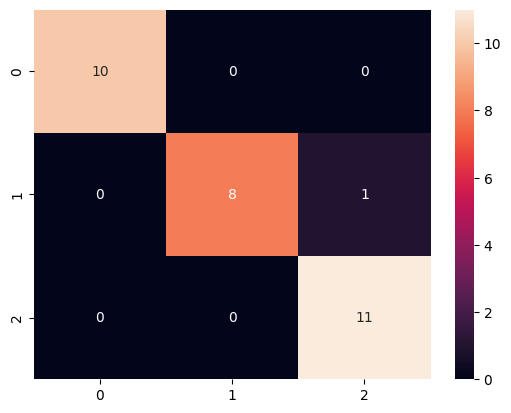

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)  # Choosing my k
knn.fit(X_train,y_train)   # Training my algorithm
y_pred = knn.predict(X_test) # New exam and predictions


cm = confusion_matrix(y_test,y_pred)
plt.xlabel("Predicha")
plt.ylabel("Real")

sns.heatmap(cm,annot=True)
plt.show()

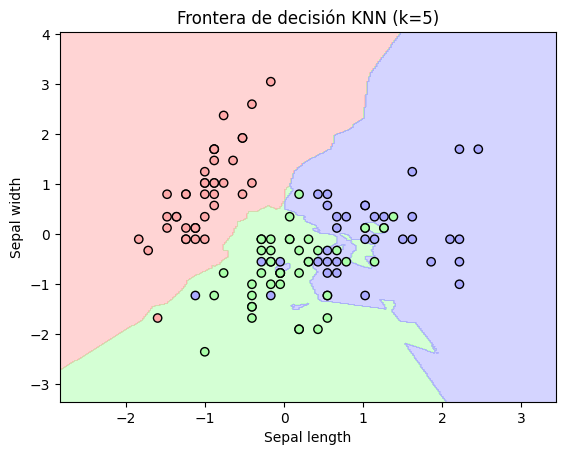

In [ ]:
# 2D border for iris
from matplotlib.colors import ListedColormap
X2 = X.iloc[:, [0,1]].values
y2 = y.values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=42, stratify=y2)
sc2 = StandardScaler()
X2_train_s = sc2.fit_transform(X2_train)
X2_test_s = sc2.transform(X2_test)

knn2 = KNeighborsClassifier(n_neighbors=5).fit(X2_train_s, y2_train)

h = .02
x_min, x_max = X2_train_s[:, 0].min() - 1, X2_train_s[:, 0].max() + 1
y_min, y_max = X2_train_s[:, 1].min() - 1, X2_train_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

cmap = ListedColormap(['# Fuaaa ',' # AAFAAF ',' # Aaaaff '])
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X2_train_s[:,0], X2_train_s[:,1], c=y2_train, edgecolor='k', cmap=cmap)
plt.xlabel(df.columns[0]); plt.ylabel(df.columns[1]);
plt.title('Frontera de decisión KNN (k=5)');

In [ ]:
def standar_scalar(vector):
  mean = np.mean(vector)
  std = np.std(vector)
  return (vector - mean)/std

In [ ]:
df["Petal length"].var()

3.1131794183445156

In [ ]:
petal_escalado = standar_scalar(df["Petal length"])

petal_escalado.var()

1.0067114093959744